In [2]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler


In [3]:
X,y = fetch_california_housing(return_X_y=True)
print(X.shape)
print(y.shape)

(20640, 8)
(20640,)


In [4]:
X_temp = np.ones((X.shape[0],X.shape[1]+1))
print(X_temp)
X_with_bias = X_temp
X_with_bias[:, 1:] = X 

[[1. 1. 1. ... 1. 1. 1.]
 [1. 1. 1. ... 1. 1. 1.]
 [1. 1. 1. ... 1. 1. 1.]
 ...
 [1. 1. 1. ... 1. 1. 1.]
 [1. 1. 1. ... 1. 1. 1.]
 [1. 1. 1. ... 1. 1. 1.]]


In [5]:
X_train, X_test, y_train, y_test = train_test_split(X_with_bias, y, test_size=0.2,random_state=42)

In [6]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)

Linear regression with gradient descent and regularization

Batch gradient descent

In [71]:
learning_rate = 0.01
epochs  = 1000
lamda = 10
size = X_train.shape[0]

In [72]:
theta = np.random.uniform(-1,1,size = X_train.shape[1])

epoch_list = []
error_list = []

print(theta)
for i in range(epochs):
    error = 0
    for x in range(size):
        total_error = 0
        total_error_data = np.zeros(X_train.shape[1] - 1)
        prediction = np.dot(X_train[x],theta)
        error = (prediction - y_train[x])
        total_error += error
        total_error_data += error * X_train[x,1:]
    theta[0] =  (1 - ((learning_rate * lamda) / size)) * theta[0] - (learning_rate/size)*total_error
    theta[1:] = (1 - ((learning_rate * lamda) / size)) * theta[1:] - (learning_rate/size)*total_error_data

    epoch_list.append(i)
    error_list.append(np.sum(total_error))

print(theta)

[-0.11905746 -0.08548217 -0.10878953 -0.7890267  -0.11660424 -0.17557645
  0.28599771 -0.19154739 -0.52091733]
[-0.11690768 -0.08594685 -0.10547663 -0.78548097 -0.11602541 -0.17301553
  0.28414875 -0.18896645 -0.51979668]


In [73]:
predictions = np.dot(X_test,theta)
print(predictions)

[-190.99880396 -222.14879977 -178.92520679 ... -226.38790996 -164.67388442
 -238.45557692]


In [74]:
print(y_test)
mse = mean_squared_error(y_test,predictions)
print(mse)

[0.477   0.458   5.00001 ... 5.00001 0.723   1.515  ]
76770.09111096805


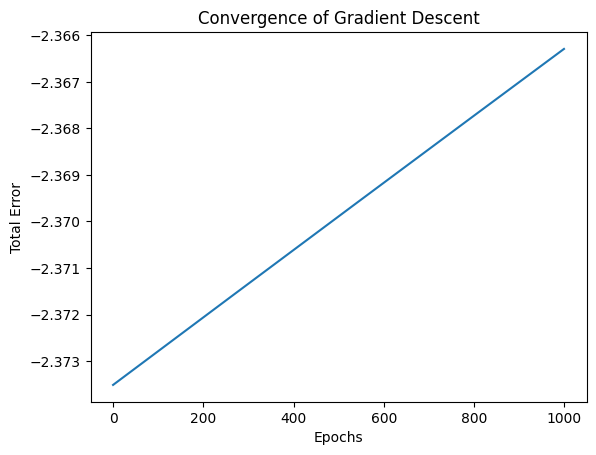

In [75]:
plt.plot(epoch_list, error_list)
plt.title('Convergence of Gradient Descent')
plt.xlabel('Epochs')
plt.ylabel('Total Error')
plt.show()

stochastic gradient descent

In [93]:
learning_rate = 0.01
epochs  = 200
lamda = 10
size = X_train.shape[0]

In [103]:
thetas = np.random.uniform(0,1,X_train.shape[1])
print(thetas)
for i in range(epochs):
    for x in range(size):
        pred = np.dot(X_train[x],thetas)
        error = pred - y_train[x]
        thetas[0] = (1 - (learning_rate*lamda)) * thetas[0] - learning_rate*error
        thetas[1:] = (1 - (learning_rate*lamda)) * thetas[1:] - learning_rate*error * X_train[x,1:]

print(thetas)

[0.45216629 0.48778831 0.04612533 0.95013353 0.90550305 0.66836766
 0.43701469 0.20855794 0.48147687]
[ 0.23484148  0.03611386  0.0983573  -0.02053145 -0.02643415  0.048557
 -0.00278964  0.00935065 -0.05507836]


In [104]:

predictio = np.dot(X_test,thetas)
print(predictio)

[77.11398068 86.03443255 76.06522045 ... 86.87970664 70.25392728
 89.89392617]


In [105]:
print(y_test)
mse = mean_squared_error(y_test,predictio)
print(mse)

[0.477   0.458   5.00001 ... 5.00001 0.723   1.515  ]
8807.447549637647
